In [1]:
import seaborn as sns
import math
import numpy as np
from scipy.stats import norm  # таблица накопленного нормраспределения z
sns.set_theme()

Функция нормального распределения  
$f(x) = \dfrac{1}{\sigma\sqrt[2]{2\pi}}e^{-\dfrac{(x-\mu)^2}{2\sigma^2}}$ 

In [2]:
# стандартные параметры нормального распределения
def norm_mu_func(lst): 
    return sum(lst) / len(lst)

def norm_dispersion_func(data):
    mean = norm_mu_func(data)
    d_sum = 0
    for i in data:
        d_sum = d_sum + (mean - i)**2
    return d_sum / len(data)

def norm_sigma_func(data):
    return norm_dispersion_func(data)**0.5

def norm_dist_graph(data, X=None):
    M = norm_mu_func(data)
    sigma = norm_sigma_func(data)
    y = lambda data: list(map(lambda x: \
               math.e**(-((x-M)**2)/(2*sigma**2)) / (sigma  * (2*math.pi)**0.5), \
               data))
    if X:
        return y([X])
    else:
        plt = sns.lineplot(x=data, y=y(data))
        plt.axvline(M)
        plt.axvline(M-sigma)
        plt.axvline(M+sigma)

def norm_get_z(to_find, sigma, M):
    return (to_find - M) / sigma

def norm_z_to_probability(z):
    '''
    вытащить значение из таблицы накопленного нормального распредееления по z
    '''
    return norm.cdf(z)

Функция равномерного распределения
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f4e45a7493722bad342c64c9a133e5979f11d05c">

In [3]:
# стандартные параметры равномерного распределения
def ravn_mu_func(data): 
    return (max(data)+min(data))/2

def ravn_dispersion_func(data):
    return (max(data)-min(data))**2 / 12

def ravn_sigma_func(data):
    return ravn_dispersion_func(data)**0.5

def ravn_dist_graph(data, X=None):
    M = ravn_mu_func(data)
    sigma = ravn_sigma_func(data)
    a = min(data)
    b = max(data)
    y = lambda data: list(map(lambda x: \
                              (x-a) / (b-a), \
                              data))
    for ind, i in enumerate(y(data)):
        if i < 0:
            y[ind] = 0
        if i > 1:
            y[ind] = 1
    if X:
        return y([X])
    else:
        return sns.lineplot(x=x, y=y(x))

# (1) Случайная непрерывная величина A имеет равномерное распределение на промежутке (200, 800].
### **Найдите ее среднее значение и дисперсию.**

In [4]:
x = list(range(201, 801))
M = ravn_mu_func(x)
D = ravn_dispersion_func(x)
sigma = ravn_sigma_func(x)
print(f'Среднее значение (мат.ожидание): {M}\nДисперсия: {D}\nСр.кв.отклонение: {sigma}')

Среднее значение (мат.ожидание): 500.5
Дисперсия: 29900.083333333332
Ср.кв.отклонение: 172.9164056222929


<AxesSubplot:>

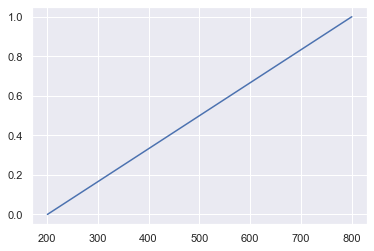

In [5]:
ravn_dist_graph(x)

# (2) О случайной непрерывной равномерно распределенной величине B известно, что ее дисперсия равна 0.2.
## **Можно ли найти правую границу величины B и ее среднее значение зная, что левая граница равна 0.5?**
Если да, найдите ее.

In [6]:
a = 0.5  # левая граница
D = 0.2  # дисперсия
sigma = D**0.5

Выводим формулу для расчета b (правой границы) из формулы Дисперсии  
$D = \dfrac{(b-a)^2}{12}$  
$\sqrt[2]{D} = \dfrac{b-a}{\sqrt[2]{12}} $  
$\sqrt[2]{12D} = b-a$  
$b = \sqrt[2]{12D} + a$

In [7]:
b = (12*D)**0.5 + a  # правая граница
b

2.049193338482967

In [8]:
mu = (a+b) / 2 # мат.ожидание (среднее)
mu

1.2745966692414834

# (3) Непрерывная случайная величина X распределена нормально и задана плотностью распределения
f(x) = (1 / (4 \* sqrt(2\*pi))) \* (exp(-(x+2)\*\*2) / 32).
## Найдите:
## а). M(X)
## б). D(X)
## в). std(X) (среднее квадратичное отклонение)

In [9]:
# исходя из значений, подставлеенных в формулу
sigma = 4
D = 32 / 2  # или 4**2
M = -2  # в формуле x-2, а здесь +2
print(f'Среднее значение (мат.ожидание): {M}\nДисперсия: {D}\nСр.кв.отклонение: {sigma}')

Среднее значение (мат.ожидание): -2
Дисперсия: 16.0
Ср.кв.отклонение: 4


# (4) Рост взрослого населения города X имеет нормальное распределение.
## Причем, средний рост равен 174 см, а среднее квадратичное отклонение равно 8 см.
## Какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:
## а). больше 182 см
## б). больше 190 см
## в). от 166 см до 190 см
## г). от 166 см до 182 см
## д). от 158 см до 190 см
## е). не выше 150 см или не ниже 190 см
## ё). не выше 150 см или не ниже 198 см
## ж). ниже 166 см.

In [10]:
M = 174
sigma = 8
D = 8 ^ 2

(174.0, None)

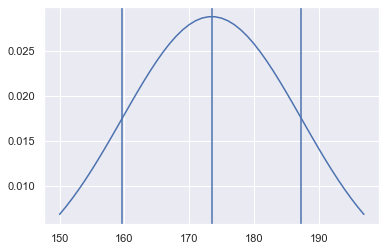

In [11]:
# примерное похожее распределение для понимания
norm_mu_func([150,198]), norm_dist_graph(list(range(150,198)))

In [12]:
# а). больше 182 см
to_find = 182
z = norm_get_z(to_find, sigma, M)
P_z_less = norm_z_to_probability(z)  # столько % приходится на людей с ростом менее 182
P_z_more182 = 1-P_z_less  # столько % приходится на людей с ростом выше 182
P_z_more182

0.15865525393145707

In [13]:
# б). больше 190 см.
to_find = 190
z = norm_get_z(to_find, sigma, M)
P_z_less = norm_z_to_probability(z)
P_z_more190 = 1-P_z_less
P_z_more190

0.02275013194817921

In [14]:
# в). от 166 см до 190 см
to_find = 165
z = norm_get_z(to_find, sigma, M)
P_z_less = norm_z_to_probability(z)
P_z_more165 = 1-P_z_less
P_z_165_190 = P_z_more165 - P_z_more190
P_z_more165

0.8697054828631912

In [15]:
# г). от 166 см до 182 см
to_find = 166
z = norm_get_z(to_find, sigma, M)
P_z_less = norm_z_to_probability(z)
P_z_more165 = 1-P_z_less
P_z_165_190 = P_z_more165 - P_z_more182
P_z_165_190

0.6826894921370859

In [16]:
# д). от 158 см до 190 см
to_find = 158
z = norm_get_z(to_find, sigma, M)
P_z_less = norm_z_to_probability(z)
P_z_more158 = 1-P_z_less
P_z_158_190 = P_z_more158 - P_z_more190
P_z_more165

0.8413447460685429

In [17]:
# е). не выше 150 см или не ниже 190 см
to_find = 150
z = norm_get_z(to_find, sigma, M)
P_z_less150 = norm_z_to_probability(z)
P_z_less165_more190 = max(P_z_less150, P_z_more190)
P_z_less165_more190

0.02275013194817921

In [18]:
# ё). не выше 150 см или не ниже 198 см
to_find = 198
z = norm_get_z(to_find, sigma, M)
P_z_less198 = norm_z_to_probability(z)
P_z_more198 = 1 - P_z_less198
P_z_less150_more198 = max(P_z_less150, P_z_more198)
P_z_less150_more198

0.0013498980316301035

In [19]:
# ж). ниже 166 см.
to_find = 166
z = norm_get_z(to_find, sigma, M)
P_z_less166 = norm_z_to_probability(z)
P_z_less166

0.15865525393145707

# (5) На сколько сигм (средних квадратичных отклонений) отклоняется рост человека, равный 190 см, от математического ожидания роста в популяции, в которой M(X) = 178 см и D(X) = 25 кв.см?

In [20]:
M = 178
D = 25
sigma = 25**0.5
x = 190

In [21]:
(x - M) / sigma

2.4